# 3주차

# 목차 (step)

step1) 선홍님이 전처리 하여 주신 관광지별 데이터 프레임으로 모델링을 진행해보고 그 전에 첫 번째 최적 칼럼 찾기가 끝나서 내가 올린 관광지별 데이터프레임으로도 모델링을 진행하고 비교

step2) 그 결과 statsmodel은 선홍님이 주신 데이터들이 좋았으나, 모델 측면에서는 내가 처음 올렸던 데이터프레임이 결과가 더 좋았음.

step3) 이를 바탕으로 scaler, pca 등등을 동원하여 rmse를 낮추고, test_score(=model.score(x_test, y_test))를 높이려고 했으나, 실패


step4) 이에 따라 프로젝트 처음부터 이번주까지 모든 과정을 의심하였고, 크게 두 가지에 대한 의심을 하고 해결책을 찾으려고 하였음.


step5) 첫 번째 의심의 순간은 처음에 일별데이터를 평균값으로 월별데이터로 바꾼 것을 의심하여, 기상청 공식 월별데이터를 수집하여 다시 처음부터 분석을 진행하였음.

step6) 최적 칼럼 찾기 담당이 나였던 만큼, 최적 칼럼 찾는 부분에 대한 의심을 수없이 하였고, 두 가지를 의심하였음.

step7) 첫 번째는 단일 모델로 최적 칼럼을 찾으려 했던 점을 의심하였고, 두 번째는 과녁이동문제를 의심하였음. 여기서, 과녁이동 문제란, train_test_split으로 랜덤으로 test 20%를 뽑은 다음 이를 과녁으로 두고 rmse를 낮추고, test_score를 높이면, 2019년을 test로 두어도, 오히려 결과가 좋을 것이라고 생각했음.

step7-1) 이에 대한 근거로는 계절과 날씨는 주기성을 가지기 때문 (봄에서 여름이 되면 덥다, 가을에서 겨울이 되면 춥다 등등). 이에 따라 오히려 랜덤으로 섞어줘야 이러한 Adbvantage를 부여하지 않다고 생각해서, random으로 test를 맞추고 진행하였음.

step8) 그러나, 실제로 test값을 train_test_split의 test에서 2019년으로 옮기면서 과녁이 바뀌고 이에 따라 처음 test에 초점을 두고 최적칼럼을 찾아주면서, 0점 조절을 한 결과가
과녁이 바뀌면서 모든 모델에서 결과가 무너지는 상황이 발생하였음.

step9) 이에 따라 가설을 2020년 이후는 코로나 변수가 크기 때문에 2019년 이전의 데이터를 기반으로 2018년 까지 날씨와 관광객 데이터를 부여하고 인공지능에게 학습시켜서 2019년에 날씨데이터만으로 관광객 수를 예측하는 것으로 가설을 수정

step10) 가설을 수정한 뒤, 기상청 월별 공식데이터를 기반으로 다시 최적칼럼 찾기를 시작하여 새로운 관광지별 데이터프레임을 생성하는 것까지 이번주에 진행하였고, 최적칼럼을 찾는 방식도 대폭 수정하였음.

모든 관광지에 대한 분석과정을 전부 다 보여드리고 싶으나, 그리거엔 양이 너무 많으므로, 분석과정에서 가장 문제가 되었던 덕수궁을 예시로 진행하겠습니다.
--

더 자세히 보고 싶으신 분은

EDA&MODEL_Helper 1탄

https://colab.research.google.com/drive/1EpanBTjR64IHVP8iF2yd_QxypjllZJJb?usp=sharing

EDA&MODEL_Helper 2탄

https://colab.research.google.com/drive/1fS8-ixprI9SCZodVb3WQGl07f_4qw6cp?usp=sharing


최적칼럼찾기 1탄

https://colab.research.google.com/drive/1g29UlDzrWEJox71RpnNTeswgjimgSgBX?usp=sharing

# step1) 선홍님이 전처리 하여 주신 관광지별 데이터 프레임으로 모델링을 진행해보고 그 전에 첫 번째 최적 칼럼 찾기가 끝나서 내가 올린 관광지별 데이터프레임으로도 모델링을 진행하고 비교

#step2) 그 결과 statsmodel은 선홍님이 주신 데이터들이 좋았으나, 모델 측면에서는 내가 처음 올렸던 데이터프레임이 결과가 더 좋았음.

In [ ]:
# 전처리 이전 statsmodel 보는 함수
def statsmodel_2(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]
    x_constant=sm.add_constant(x)
    model_1=sm.OLS(y,x_constant)
    lin_reg=model_1.fit()
    view=lin_reg.summary()
    return view

In [ ]:
# 전처리 이후 statsmodel보는 함수
def statsmodel(df):
    x=df.drop(['target'], axis=1)
    y=df['target']
    x_constant=sm.add_constant(x)
    model_1=sm.OLS(y,x_constant)
    lin_reg=model_1.fit()
    view=lin_reg.summary()
    return view

Statsmodel 비교
--

전처리 이전

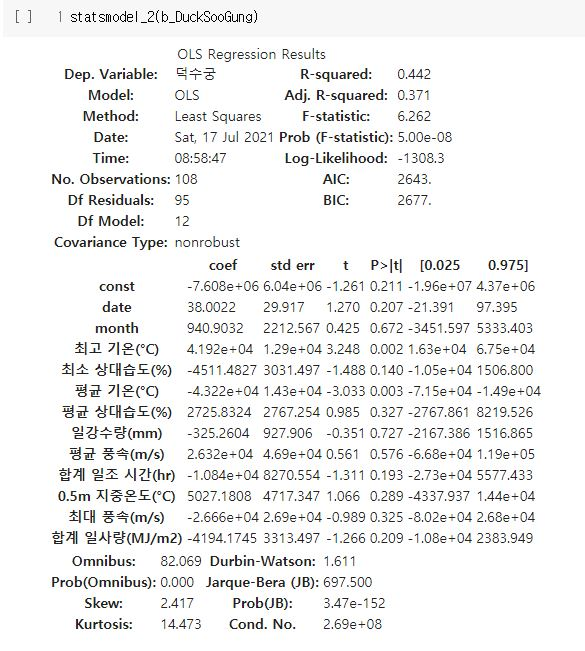

전처리 이후

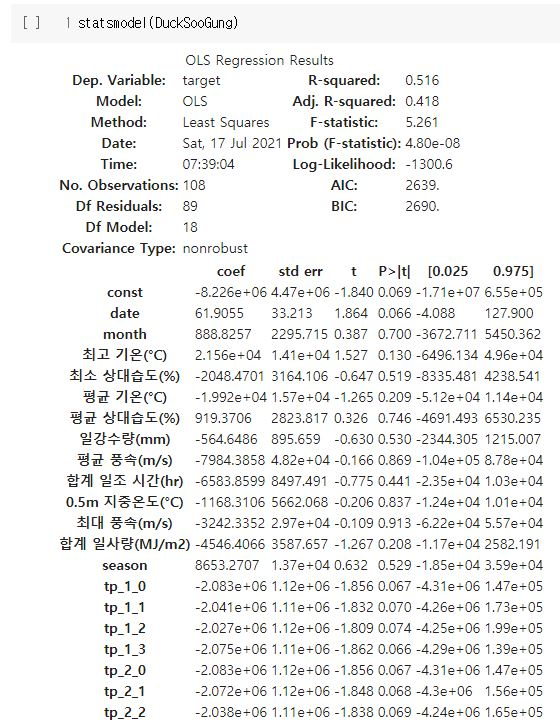

Model 결과 비교
--

In [ ]:
# class를 앞에 붙여준 이후는 import xgboost를 했는데,
# 함수 이름을 xgboost로 설정한 뒤, xgboost(인자)를 입력하면 꼬이는 경우가 생깁니다.
# 앞에  class를 붙여 주면 regression_select.xgboost로 씀으로써 이를 막아줍니다.

class regression_select:
    def linear(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def ridge(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lasso(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def elasticnet(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def xgboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        xgb = xgboost.XGBRegressor()
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lgbm(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         lgbm = lightgbm.LGBMRegressor()
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def catboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         cb = catboost.CatBoostRegressor()
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

In [ ]:
# 위의 함수들로 부터 모든 정보를 받아 데이터프레임을 생성해준뒤,
# test_score(=model.score(x_test, y_test))가 높은 순으로 정렬해줍니다.

class regression_model:
    def model_choice(x,y):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        linear_rmse=regression_select.linear(x,y)[0]
        linear_train_score=regression_select.linear(x,y)[1]
        linear_test_score=regression_select.linear(x,y)[2]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x,y)[0]
        ridge_train_score=regression_select.ridge(x,y)[1]
        ridge_test_score=regression_select.ridge(x,y)[2]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x,y)[0]
        lasso_train_score=regression_select.lasso(x,y)[1]
        lasso_test_score=regression_select.lasso(x,y)[2]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x,y)[0]
        elasticnet_train_score=regression_select.elasticnet(x,y)[1]
        elasticnet_test_score=regression_select.elasticnet(x,y)[2]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x,y)[0]
        xgboost_train_score=regression_select.xgboost(x,y)[1]
        xgboost_test_score=regression_select.xgboost(x,y)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        

        lgbm_rmse=regression_select.lgbm(x,y)[0]
        lgbm_train_score=regression_select.lgbm(x,y)[1]
        lgbm_test_score=regression_select.lgbm(x,y)[2]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x,y)[0]
        catboost_train_score=regression_select.catboost(x,y)[1]
        catboost_test_score=regression_select.catboost(x,y)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [ ]:
#전처리 이전의 결과를 출력하는 함수
def make_list(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]
    model_choice=regression_model.model_choice(x,y)
    return model_choice

In [ ]:
#전처리 이후의 결과를 출력하는 함수
def model_list(df):
    df=df
    x=df.drop(['target'], axis=1)
    y=df['target']
    model_choice=regression_model.model_choice(x,y)
    return model_choice

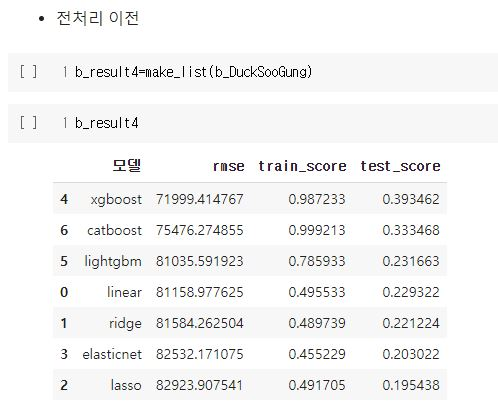

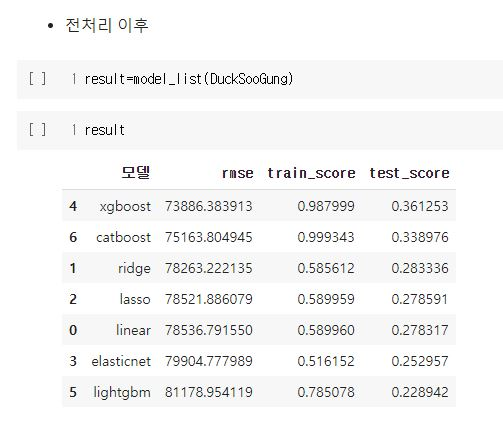

- 오히려 전처리 이후가 결과가 안 좋은 것을 확인 할 수 있습니다.

#step3) 이를 바탕으로 scaler, pca 등등을 동원하여 rmse를 낮추고, test_score(=model.score(x_test, y_test))를 높이려고 했으나, 실패

Hypothesis 1. Scaler 적용
--

관광지/ 원래 점수

관광지NUM / StandardScaler최고테스트점수/MinMaxScaler최고테스트점수/RobustScaler최고테스트점수

4. 덕수궁 0.39

    4/0.33/0.31/0.31

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

s_scaler = StandardScaler()
m_scaler = MinMaxScaler()
r_scaler = RobustScaler()

def scaler_list(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]

    x_1=r_scaler.fit_transform(x)
    y_1=r_scaler.fit_transform(y)

    #x=pd.DataFrame(x_1, index=x.index, columns=x.columns)
    #y=pd.DataFrame(y_1, index=y.index, columns=y.columns)

    model_choice=regression_model.model_choice(x_1,y_1)
    return model_choice

RobustScaler 예시

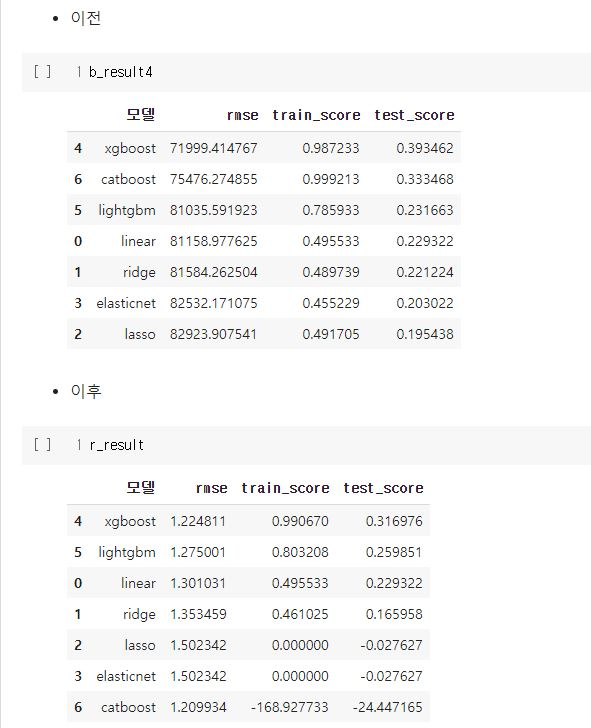

Hypothesis 2. PCA 적용
--

In [ ]:
from sklearn.decomposition import PCA
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()
r_scaler = RobustScaler()
pca=PCA()

def pca_list(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]

    x_1=s_scaler.fit_transform(x)
    y_1=s_scaler.fit_transform(y)

    pca.fit(x_1)
    pca_x=pca.transform(x_1)

    #x=pd.DataFrame(x_1, index=x.index, columns=x.columns)
    #y=pd.DataFrame(y_1, index=y.index, columns=y.columns)

    model_choice=regression_model.model_choice(pca_x,y_1)
    return model_choice

위의 경우에는 경복궁에서 stop하여서, 덕수궁은 없음.

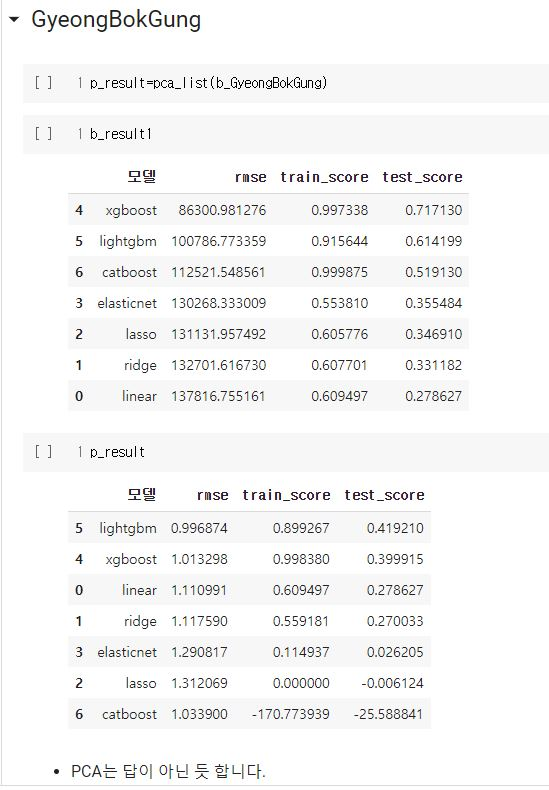

Hypothesis 3. 다른 모델 찾기
--

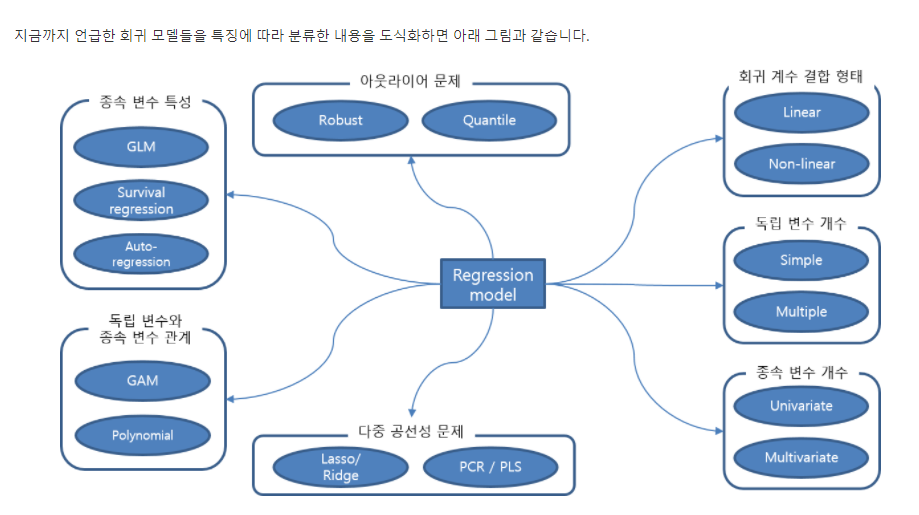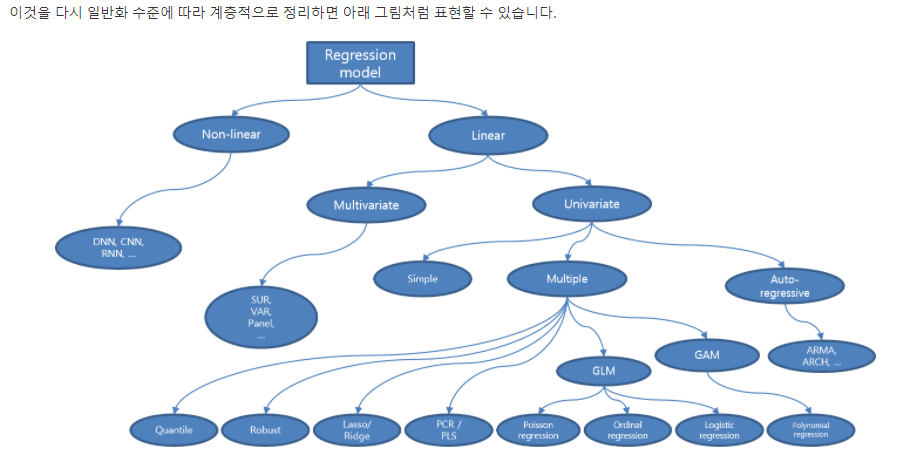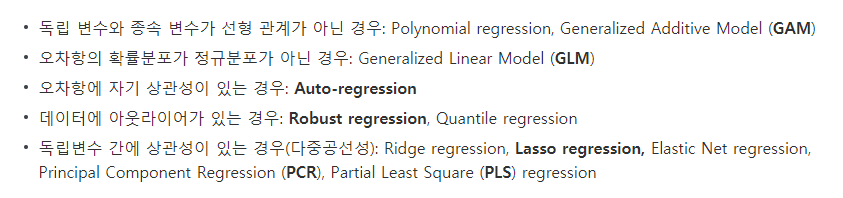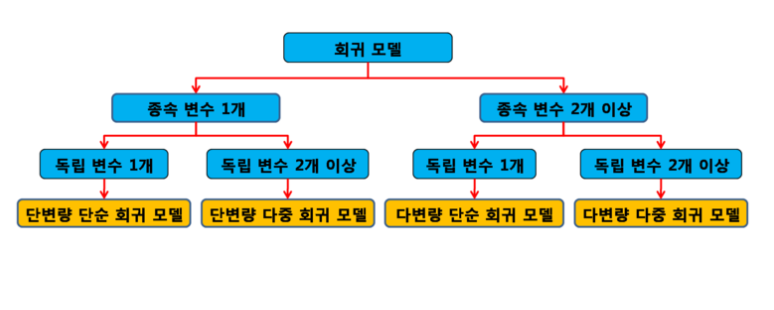

잔차 분석
--

In [ ]:
def xgb_linearity(df):
    #선형성
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    name=df.columns[-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    xgb_reg=xgb.XGBRegressor(random_state=42)
    xgb_reg.fit(x_train, y_train)
    XGBscore_train = xgb_reg.score(x_train, y_train)
    xgb_pred=xgb_reg.predict(x_test)
    xgb_pred=pd.DataFrame(xgb_pred, columns=[name])
    residual=y_test.values-xgb_pred.values
    plt.rcParams['font.family'] = 'NanumGothic'
    sns.regplot(xgb_pred, residual, lowess=True, line_kws={'color': 'red'})
    plt.plot([xgb_pred.min(), xgb_pred.max()], [0, 0], '--', color='grey')
    plt.show()


def xgb_normality(df):
    # 정규성
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    name=df.columns[-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
    xgb_reg=xgb.XGBRegressor(random_state=42)
    xgb_reg.fit(x_train, y_train)
    XGBscore_train = xgb_reg.score(x_train, y_train)
    xgb_pred=xgb_reg.predict(x_test)
    xgb_pred=pd.DataFrame(xgb_pred, columns=[name])
    residual=y_test.values-xgb_pred.values

    sr = scipy.stats.zscore(residual)
    sns.distplot(sr)   
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.show()


def xgb_hvtest(df):
    # Homogeneity of Variance Test(등분산성 검정)
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    name=df.columns[-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
    xgb_reg=xgb.XGBRegressor(random_state=42)
    xgb_reg.fit(x_train, y_train)
    XGBscore_train = xgb_reg.score(x_train, y_train)
    xgb_pred=xgb_reg.predict(x_test)
    xgb_pred=pd.DataFrame(xgb_pred, columns=[name])
    residual=y_test.values-xgb_pred.values

    sr = scipy.stats.zscore(residual) 
    sns.regplot(xgb_pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.show()


def xgb_feature_importances(df):
    # feature_importance 출력
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
    xgb_reg=xgb.XGBRegressor(random_state=42)
    xgb_reg.fit(x_train, y_train)
    XGBscore_train = xgb_reg.score(x_train, y_train)
    xgb_pred=xgb_reg.predict(x_test)

    n_features = x_train.shape[1]
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.barh(np.arange(n_features), xgb_reg.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

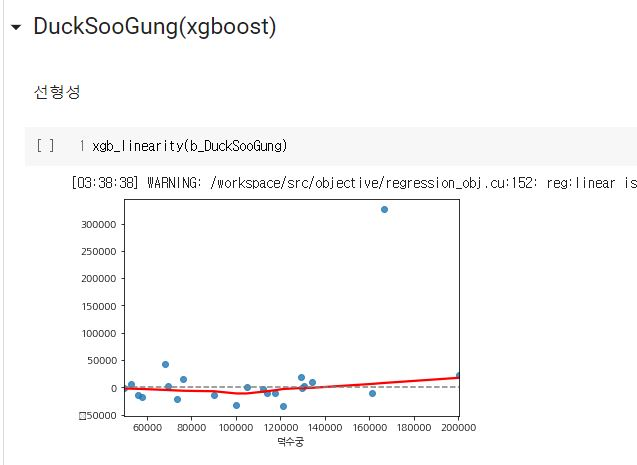

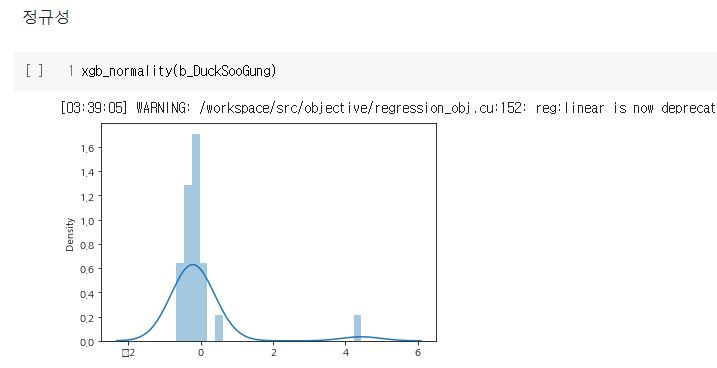

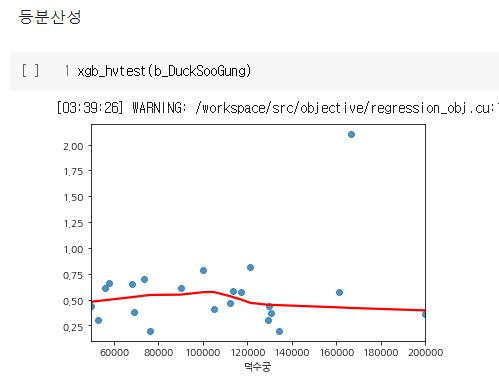

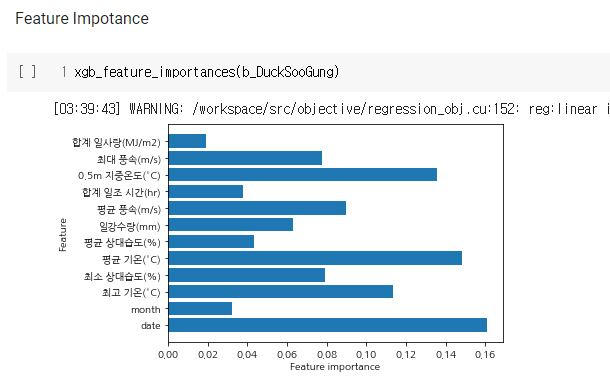

시계열
--

회귀로 잡히지 않아서 시계열로 접근하려 시도

In [ ]:
time_series=pd.DataFrame(columns=['GyeongBokGung','NationalMuseumOfKorea',
                                  'NamSanGolHanOkVillage','DuckSooGung',
                                  'SeoDaeMunNaturalHistoryMuseum',
                                  'SeoDaeMunPrisonHistoryMuseum',
                                  'SeoulMuseumOfArt',
                                  'SunReungJungReung',
                                  'JongMyo', 'ChangGyeongGung',
                                  'ChangDeokGung','TaeReungGangNeung',
                                  'TrickEyeMuseum','HeonLeungInReung'])

In [ ]:
time_series['GyeongBokGung']=b_GyeongBokGung['경복궁']
time_series['NationalMuseumOfKorea']=b_NationalMuseumOfKorea['국립중앙박물관']
time_series['NamSanGolHanOkVillage']=b_NamSanGolHanOkVillage['남산골한옥마을']
time_series['DuckSooGung']=b_DuckSooGung['덕수궁']

In [ ]:
time_series['SeoDaeMunNaturalHistoryMuseum']=b_SeoDaeMunNaturalHistoryMuseum['서대문자연사박물관']
time_series['SeoDaeMunPrisonHistoryMuseum']=b_SeoDaeMunPrisonHistoryMuseum['서대문형무소역사관']
time_series['SeoulMuseumOfArt']=b_SeoulMuseumOfArt['서울시립미술관 본관']
time_series['SunReungJungReung']=b_SunReungJungReung['선릉·정릉']
time_series['TaeReungGangNeung']=b_TaeReungGangNeung['태릉 ·  강릉 · 조선왕릉전시관']
time_series['TrickEyeMuseum']=b_TrickEyeMuseum['트릭아이미술관']
time_series['ChangDeokGung']=b_ChangDeokGung['창덕궁']
time_series['ChangGyeongGung']=b_ChangGyeongGung['창경궁']
time_series['HeonLeungInReung']=b_HeonLeungInReung['헌릉ㆍ인릉']
time_series['JongMyo']=b_JongMyo['종묘']

ARIMA 적용

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

def my_auto_arima(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df.head(3)

In [ ]:
for i in range(0,14):
    y=time_series.iloc[:, i]
    name=time_series.columns[i]
    print(name)
    auto_df=my_auto_arima(y, [3,3,3])
    print(auto_df)

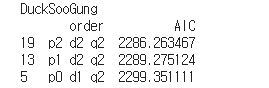

In [ ]:
y=time_series.iloc[:, 3]
a=2
b=2
c=2

arima(y, a,b,c)

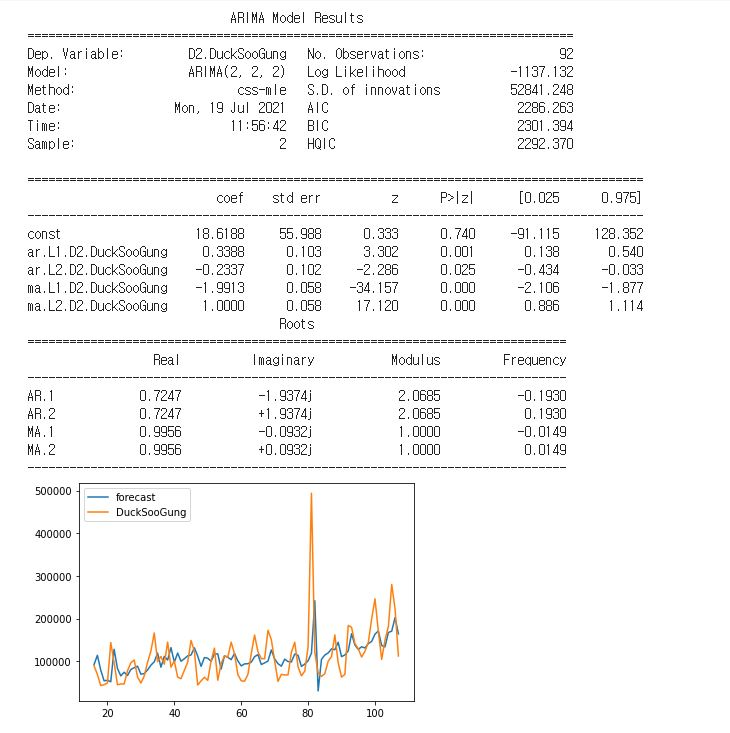

SHAP
--

- 빨간 색: 모델이 예측하는데 긍정적인 영향

- 파란 색: 모델이 예측하는데 부정적인 영향

In [ ]:
!pip install shap

In [ ]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/shap-0.26.0-py2.7-macosx-10.9-x86_64.egg')
import shap

In [ ]:
xgb = xgboost.XGBRegressor()
cb = catboost.CatBoostRegressor()
lgbm = lightgbm.LGBMRegressor()

In [ ]:
sns.set_style('darkgrid')

In [ ]:
## 요약 보여주는 함수
def xgb_shap_summary(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]

    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb = xgboost.XGBRegressor()
    xgb.fit(x_train, y_train)
    y_pred=xgb.predict(x_test)
    train_score=xgb.score(x_train, y_train)
    test_score=xgb.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    shap.summary_plot(shap_values, x)
    plt.show()

### feature importance 보여주는 함수
def xgb_shap_plot(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]

    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb = xgboost.XGBRegressor()
    xgb.fit(x_train, y_train)
    y_pred=xgb.predict(x_test)
    train_score=xgb.score(x_train, y_train)
    test_score=xgb.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    shap.summary_plot(shap_values, x, plot_type="bar")
    plt.show()


## 칼럼별로 특징 보여주는 함수
def xgb_shap_columns(df, i):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]

    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb = xgboost.XGBRegressor()
    xgb.fit(x_train, y_train)
    y_pred=xgb.predict(x_test)
    train_score=xgb.score(x_train, y_train)
    test_score=xgb.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    name=df.columns[i]
    shap.dependence_plot(name, shap_values, x)
    plt.show()


## 행별로 특징 보여주는 함수
def xgb_shap_rows(df, i):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]

    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb = xgboost.XGBRegressor()
    xgb.fit(x_train, y_train)
    y_pred=xgb.predict(x_test)
    train_score=xgb.score(x_train, y_train)
    test_score=xgb.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(x)
    plt.rcParams['font.family'] = 'NanumGothic'
    row=x.iloc[i, :]
    shap.force_plot(explainer.expected_value, shap_values[0, :], row, matplotlib=True) 
    plt.show()


##### 여기서 부터 밑에는 월별로 특징 보여주는 함수 ###
def Jan(df):
    Jan=df.loc[df['month']==1]
    Jan=Jan.reset_index()
    Jan.drop(['index'], axis=1, inplace=True)
    return Jan

def Feb(df):
    Feb=df.loc[df['month']==2]
    Feb=Feb.reset_index()
    Feb.drop(['index'], axis=1, inplace=True)
    return Feb

def Mar(df):
    Mar=df.loc[df['month']==3]
    Mar=Mar.reset_index()
    Mar.drop(['index'], axis=1, inplace=True)
    return Mar

#############

def April(df):
    April=df.loc[df['month']==4]
    April=April.reset_index()
    April.drop(['index'], axis=1, inplace=True)
    return April

def May(df):
    May=df.loc[df['month']==5]
    May=May.reset_index()
    May.drop(['index'], axis=1, inplace=True)
    return May

def June(df):
    June=df.loc[df['month']==6]
    June=June.reset_index()
    June.drop(['index'], axis=1, inplace=True)
    return June

################    

def July(df):
    July=df.loc[df['month']==7]
    July=July.reset_index()
    July.drop(['index'], axis=1, inplace=True)
    return July

def Aug(df):
    Aug=df.loc[df['month']==8]
    Aug=Aug.reset_index()
    Aug.drop(['index'], axis=1, inplace=True)
    return Aug

def Sep(df):
    Sep=df.loc[df['month']==9]
    Sep=Sep.reset_index()
    Sep.drop(['index'], axis=1, inplace=True)
    return Sep    

################    

def Oct(df):
    Oct=df.loc[df['month']==10]
    Oct=Oct.reset_index()
    Oct.drop(['index'], axis=1, inplace=True)
    return Oct

def Nov(df):
    Nov=df.loc[df['month']==11]
    Nov=Nov.reset_index()
    Nov.drop(['index'], axis=1, inplace=True)
    return Nov

def Dec(df):
    Dec=df.loc[df['month']==12]
    Dec=Dec.reset_index()
    Dec.drop(['index'], axis=1, inplace=True)
    return Dec   

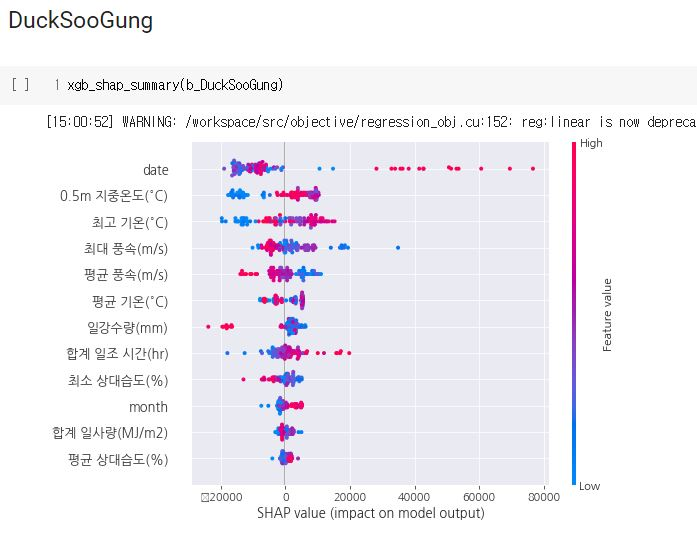

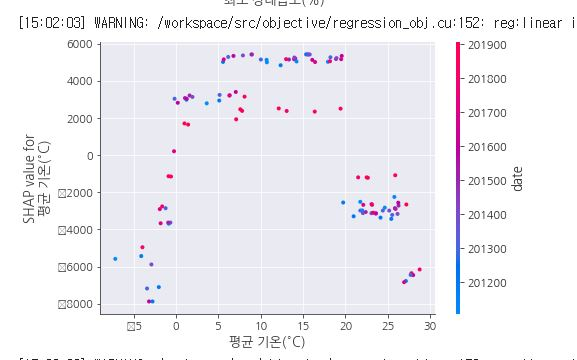

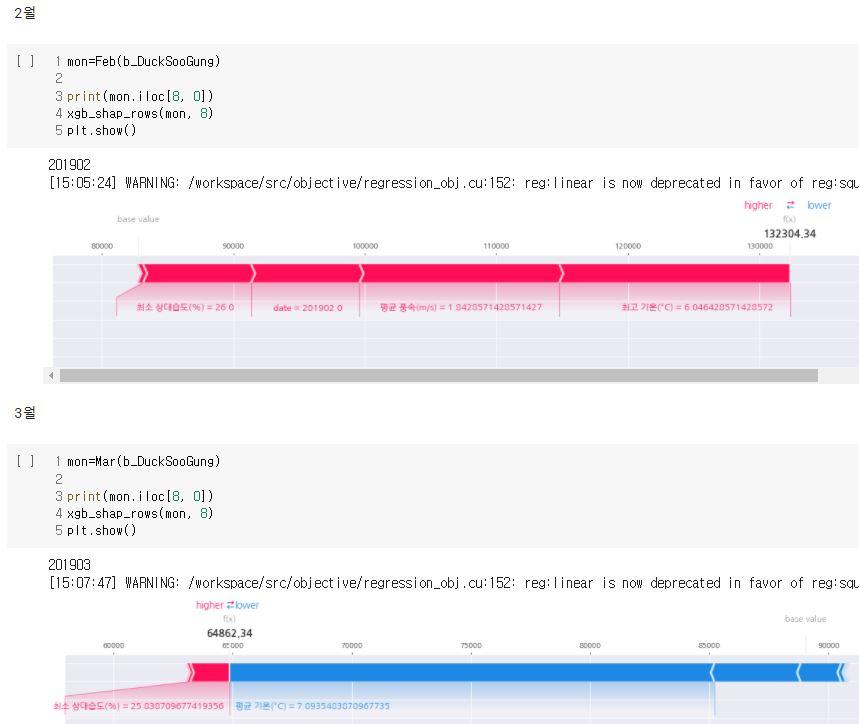

- 월별로 비교하면서 패턴을 잡고 가설을 세우려 했으나 실패

Grid Search CV
--

In [ ]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[1,10,100], 'min_child_weight':[4,5]},
           {'bootstrap':[False],'learning_rate':[0.1,0.05,0.01],'max_depth':[1,5,10],
           'sub_sample':[0.5,0.7,1.0]}, {'colsample_bytree':[i/10.0 for i in range(6,11)]}]

In [ ]:
def make_df(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def best_params(df):
    df=df
    x_train=make_df(df)[0]
    x_test=make_df(df)[1]
    y_train=make_df(df)[2]
    y_test=make_df(df)[3]
    xgb_ = xgb.XGBRegressor(random_state=42, bootstrap=False)
    grid_search=GridSearchCV(xgb_, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score= True) 
    grid_search.fit(x_train, y_train)
    best_params=grid_search.best_params_
    return best_params

In [ ]:
def xgboost_result(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1:]
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    xgb_=xgb.XGBRegressor(random_state=42, colsample_bytree=0.9)
    xgb_.fit(x_train, y_train)
    y_pred=xgb_.predict(x_test)
    train_score=xgb_.score(x_train, y_train)
    test_score=xgb_.score(x_test, y_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    return rmse, train_score, test_score

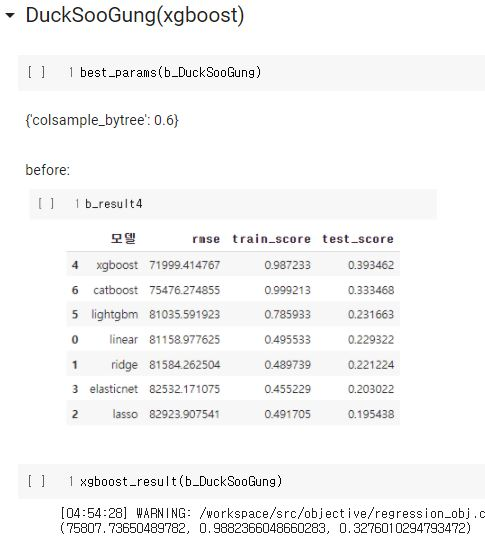

- 오히려 더 안 좋아짐.

# step4) ~ step10)

step4) 이에 따라 프로젝트 처음부터 이번주까지 모든 과정을 의심하였고, 크게 두 가지에 대한 의심을 하고 해결책을 찾으려고 하였음.

step5) 첫 번째 의심의 순간은 처음에 일별데이터를 평균값으로 월별데이터로 바꾼 것을 의심하여, 기상청 공식 월별데이터를 수집하여 다시 처음부터 분석을 진행하였음.

step6) 최적 칼럼 찾기 담당이 나였던 만큼, 최적 칼럼 찾는 부분에 대한 의심을 수없이 하였고, 두 가지를 의심하였음.

step7) 첫 번째는 단일 모델로 최적 칼럼을 찾으려 했던 점을 의심하였고, 두 번째는 과녁이동문제를 의심하였음. 여기서, 과녁이동 문제란, train_test_split으로 랜덤으로 test 20%를 뽑은 다음 이를 과녁으로 두고 rmse를 낮추고, test_score를 높이면, 2019년을 test로 두어도, 오히려 결과가 좋을 것이라고 생각했음.

step7-1) 이에 대한 근거로는 계절과 날씨는 주기성을 가지기 때문 (봄에서 여름이 되면 덥다, 가을에서 겨울이 되면 춥다 등등). 이에 따라 오히려 랜덤으로 섞어줘야 이러한 Adbvantage를 부여하지 않다고 생각해서, random으로 test를 맞추고 진행하였음.

step8) 그러나, 실제로 test값을 train_test_split의 test에서 2019년으로 옮기면서 과녁이 바뀌고 이에 따라 처음 test에 초점을 두고 최적칼럼을 찾아주면서, 0점 조절을 한 결과가 과녁이 바뀌면서 모든 모델에서 결과가 무너지는 상황이 발생하였음.

step9) 이에 따라 가설을 2020년 이후는 코로나 변수가 크기 때문에 2019년 이전의 데이터를 기반으로 2018년 까지 날씨와 관광객 데이터를 부여하고 인공지능에게 학습시켜서 2019년에 날씨데이터만으로 관광객 수를 예측하는 것으로 가설을 수정

step10) 가설을 수정한 뒤, 기상청 월별 공식데이터를 기반으로 다시 최적칼럼 찾기를 시작하여 새로운 관광지별 데이터프레임을 생성하는 것까지 이번주에 진행하였고, 최적칼럼을 찾는 방식도 대폭 수정하였음.

In [ ]:
def model_list(df, df_2):
    df=df
    df_2=df_2
    x_train=df.iloc[:-12, :]
    y_train=df_2.iloc[:-12, :]
    x_test=df.iloc[-12:, :]
    y_test=df_2.iloc[-12:, :]
    model_choice=regression_model.model_choice(x_train, y_train, x_test, y_test)
    return model_choice

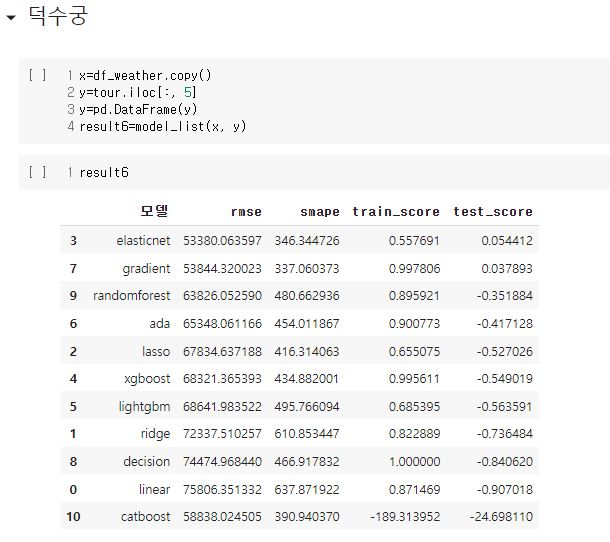

- 기상청 일별 데이터 -> 기상청 월별 데이터로 데이터를 다르게 선택 후, gradient, randomforest, adaboost, decisiontree 모델도 선택지에 추가

- 2019년 12개월치 관광객 수를 맞추는 것으로 타겟 설정

- rmse만으로 평가지표를 두는 것이 맞는 지 의심하였고, mae계열인 smape도 평가지표로 추가

최적칼럼찾기
--

Hypothesis 1. MODEL Focusing to 2019 TEST 
--

adaboost regressor의 경우에는 초기값에 따라 결과가 계속 바뀌므로, 모델 후보에서 제외 해줍니다.

catboost 또한 시간이 너무 오래 걸리므로, 모델 후보에서 제외해줍니다.

In [ ]:
class regression_columns:
    def model_choice(x_train,y_train, x_test, y_test, i):
        model=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
        linear_rmse=regression_select.linear(x_train,y_train, x_test, y_test)[0]
        linear_smape=regression_select.linear(x_train,y_train, x_test, y_test)[1]
        linear_train_score=regression_select.linear(x_train,y_train, x_test, y_test)[2]
        linear_test_score=regression_select.linear(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'linear','column_num':i, 'rmse':linear_rmse,
                            'smape':linear_smape,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x_train,y_train, x_test, y_test)[0]
        ridge_smape=regression_select.ridge(x_train,y_train, x_test, y_test)[1]
        ridge_train_score=regression_select.ridge(x_train,y_train, x_test, y_test)[2]
        ridge_test_score=regression_select.ridge(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'ridge','column_num':i, 'rmse':ridge_rmse,
                            'smape':ridge_smape,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x_train,y_train, x_test, y_test)[0]
        lasso_smape=regression_select.lasso(x_train,y_train, x_test, y_test)[1]
        lasso_train_score=regression_select.lasso(x_train,y_train, x_test, y_test)[2]
        lasso_test_score=regression_select.lasso(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lasso','column_num':i, 'rmse':lasso_rmse,
                            'smape':lasso_smape,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x_train,y_train, x_test, y_test)[0]
        elasticnet_smape=regression_select.elasticnet(x_train,y_train, x_test, y_test)[1]
        elasticnet_train_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[2]
        elasticnet_test_score=regression_select.elasticnet(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'elasticnet','column_num':i, 'rmse':elasticnet_rmse,
                            'smape':elasticnet_smape,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x_train,y_train, x_test, y_test)[0]
        xgboost_smape=regression_select.xgboost(x_train,y_train, x_test, y_test)[1]
        xgboost_train_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[2]
        xgboost_test_score=regression_select.xgboost(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'xgboost','column_num':i, 'rmse':xgboost_rmse,
                            'smape':xgboost_smape,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
    

        lgbm_rmse=regression_select.lgbm(x_train,y_train, x_test, y_test)[0]
        lgbm_smape=regression_select.lgbm(x_train,y_train, x_test, y_test)[1]
        lgbm_train_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[2]
        lgbm_test_score=regression_select.lgbm(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'lightgbm','column_num':i, 'rmse':lgbm_rmse,
                            'smape':lgbm_smape,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)

        #ada_rmse=regression_select.ada(x_train,y_train, x_test, y_test)[0]
        #ada_smape=regression_select.ada(x_train,y_train, x_test, y_test)[1]
        #ada_train_score=regression_select.ada(x_train,y_train, x_test, y_test)[2]
        #ada_test_score=regression_select.ada(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'ada', 'rmse':ada_rmse,
        
         #                   'train_score':ada_train_score,
          #                  'test_score':ada_test_score}, ignore_index=True)
        
        gradient_rmse=regression_select.gradient(x_train,y_train, x_test, y_test)[0]
        gradient_smape=regression_select.gradient(x_train,y_train, x_test, y_test)[1]
        gradient_train_score=regression_select.gradient(x_train,y_train, x_test, y_test)[2]
        gradient_test_score=regression_select.gradient(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'gradient','column_num':i, 'rmse':gradient_rmse,
                            'smape':gradient_smape,
                            'train_score':gradient_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        
        decision_rmse=regression_select.decision(x_train,y_train, x_test, y_test)[0]
        decision_smape=regression_select.decision(x_train,y_train, x_test, y_test)[1]
        decision_train_score=regression_select.decision(x_train,y_train, x_test, y_test)[2]
        decision_test_score=regression_select.decision(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'decision','column_num':i, 'rmse':decision_rmse,
                            'smape':decision_smape,
                            'train_score':decision_train_score,
                            'test_score':decision_test_score}, ignore_index=True)

        randomforest_rmse=regression_select.randomforest(x_train,y_train, x_test, y_test)[0]
        randomforest_smape=regression_select.randomforest(x_train,y_train, x_test, y_test)[1]
        randomforest_train_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[2]
        randomforest_test_score=regression_select.randomforest(x_train,y_train, x_test, y_test)[3]

        model=model.append({'모델':'randomforest','column_num':i, 'rmse':randomforest_rmse,
                            'smape':randomforest_smape,
                            'train_score':randomforest_train_score,
                            'test_score':randomforest_test_score}, ignore_index=True)
        
        #svr_rmse=regression_select.svr(x_train,y_train, x_test, y_test)[0]
         #svr_smape=regression_select.svr(x_train,y_train, x_test, y_test)[1]
        #svr_train_score=regression_select.svr(x_train,y_train, x_test, y_test)[2]
        #svr_test_score=regression_select.svr(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'svr', 'rmse':svr_rmse,
          #                      'smape':svr_smape
         #                   'train_score':svr_train_score,
         #                   'test_score':svr_test_score}, ignore_index=True)
        

        #catboost_rmse=regression_select.catboost(x_train,y_train, x_test, y_test)[0]
        #catboost_smape=regression_select.catboost(x_train,y_train, x_test, y_test)[1]
        #catboost_train_score=regression_select.catboost(x_train,y_train, x_test, y_test)[2]
        #catboost_test_score=regression_select.catboost(x_train,y_train, x_test, y_test)[3]

        #model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
        #                       'smape':catboost_smape
               #           'train_score':catboost_train_score,
               #             'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [ ]:
def columns_list(df, df_2, i):
    df=df
    df_2=df_2
    i=i 
    x_train=df.iloc[:-12, :]
    y_train=df_2.iloc[:-12, :]
    x_test=df.iloc[-12:, :]
    y_test=df_2.iloc[-12:, :]
    columns_choice=regression_columns.model_choice(x_train, y_train, x_test, y_test,i)
    return columns_choice

덕수궁
--

In [ ]:
x=df_weather[[ '소형일최대증발량 나타난날(yyyymmdd)','0.2m평균지중온도(°C)',
              '평균중하층운량(1/10)','1시간최다강수량(mm)',
               '최대순간풍속(m/s)',
              ####### 위에는 최종적으로 추가하기로 결정된 변수들 #####

               '최고해면기압 나타난날(yyyymmdd)', '최소상대습도 나타난날(yyyymmdd)',
              ##### 추가하는 것으로 확정나지 않은 변수들#####

              ##### 아래에는 추가할 변수들 후보 ######
              '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)',
       '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)',  '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)',
       '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)', '소형총증발량(mm)',
       '소형일최대증발량(mm)', '대형총증발량(mm)', '대형일최대증발량(mm)',
       '대형일최대증발량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)',
       '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)', '최대풍속 나타난날(yyyymmdd)',
       '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)', '평균운량(1/10)', 
       '합계 일조시간(hr)', '일조율(%)', '합계 일사량(MJ/m2)', '최심적설(cm)', '최심신적설(cm)',
       '3시간신적설합(cm)', '최심적설 나타난날(yyyymmdd)', '최심신적설 나타난날(yyyymmdd)',
       '평균 최저초상온도(°C)', '최저초상온도(°C)', '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)',
       '0.05m평균지중온도(°C)', '0.1m평균지중온도(°C)',  '0.3m평균지중온도(°C)',
       '0.5m평균지중온도(°C)', '1.0m평균지중온도(°C)', '1.5m평균지중온도(°C)', '3.0m평균지중온도(°C)',
       '5.0m평균지중온도(°C)', '열지수']]

y=tour.iloc[:, 5]
y=pd.DataFrame(y) 

In [ ]:
def best_columns(x,y):
    best=pd.DataFrame(columns=['모델','column_num','rmse','smape','train_score','test_score'])
    
    for i in range(7,67):
        # 초기값 0, 67 이후 0에서 하나씩 증가
        x1=x.iloc[:, i] 
        x1=pd.DataFrame(x1) 
        x2=x.iloc[:, :7] # 처음엔 넣어주면 안 됨, 초기 값 1, 이후 하나씩 증가
        x3=pd.concat([x2,x1], axis=1) # 처음엔 넣어주면 안 됨

        result=columns_list(x3, y, i) #처음에는 x1으로 넣어줘야 함, 이후 x3를 넣어줘야 함
        best=best.append({'모델':result.iloc[0, 0],'column_num':result.iloc[0, 1], 'rmse':result.iloc[0, 2],
                          'smape':result.iloc[0, 3],
                            'train_score':result.iloc[0, 4],
                            'test_score':result.iloc[0,5]}, ignore_index=True)
    best=best.sort_values('test_score', ascending=False)
    best=best.head()

    return best

In [ ]:
col_list=best_columns(x,y)

In [ ]:
col_list

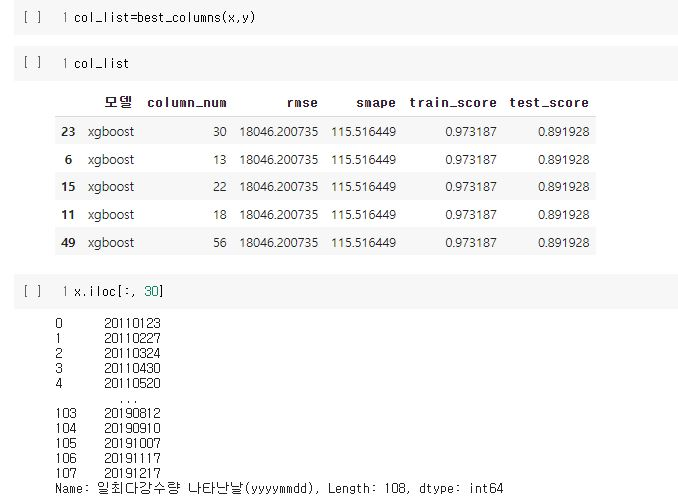

추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1) 소형일최대증발량 나타난날(yyyymmdd)

xgboost	62690.374048	344.492113	0.896741	-0.304203

2) 0.2m평균지중온도(°C)

xgboost	30008.916598	159.797019	0.977861	0.701156

3) 평균중하층운량(1/10)

xgboost	20765.468189	128.417704	0.975133	0.856904

4)  1시간최다강수량(mm)

xgboost	18889.961920	112.345818	0.977090	0.881585

5) 최대순간풍속(m/s)
--

xgboost	18046.200735	115.516449	0.973187	0.891928
--

- 동일함

6) 최고해면기압 나타난날(yyyymmdd)

xgboost	18046.200735	115.516449	0.973187	0.891928

7) 최소상대습도 나타난날(yyyymmdd)

xgboost		18046.200735	115.516449	0.973187	0.891928

8)  일최다강수량 나타난날(yyyymmdd)

xgboost	18046.200735	115.516449	0.973187	0.891928

- 더이상 오르지 않으므로 최대 순간 풍속까지에서 stop

변수 선택법 바뀐 점
--

<big>**이전 전진 선택법 예시**</big>

-----

find best columns
--

model: xgboost
--

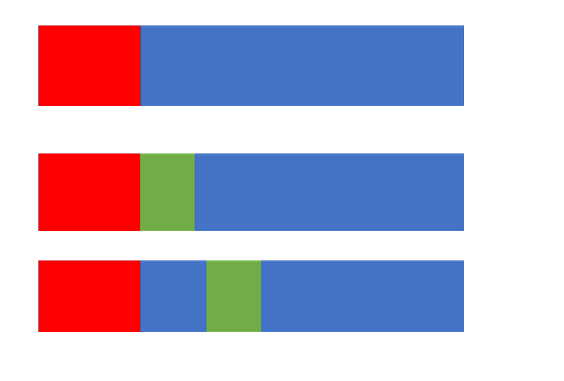

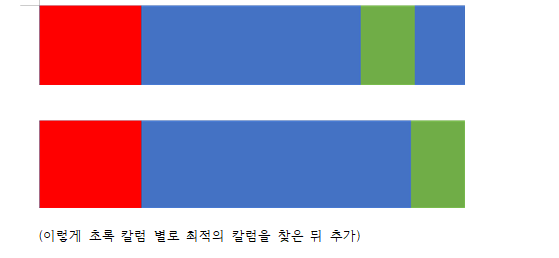

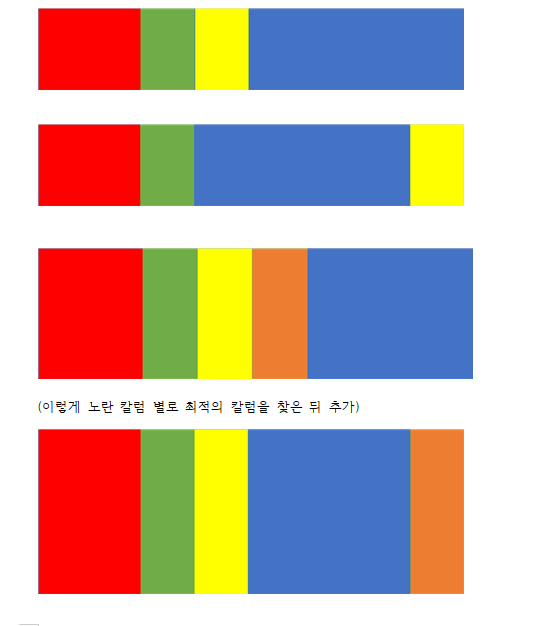

<big>**Upgrade된 전진 선택법 예시**</big>

-----

find best of best columns
--

model: linear, lasso, ridge, elastic net, decision tree, random forest, gradient boosting, xgboost, lightgbm
--

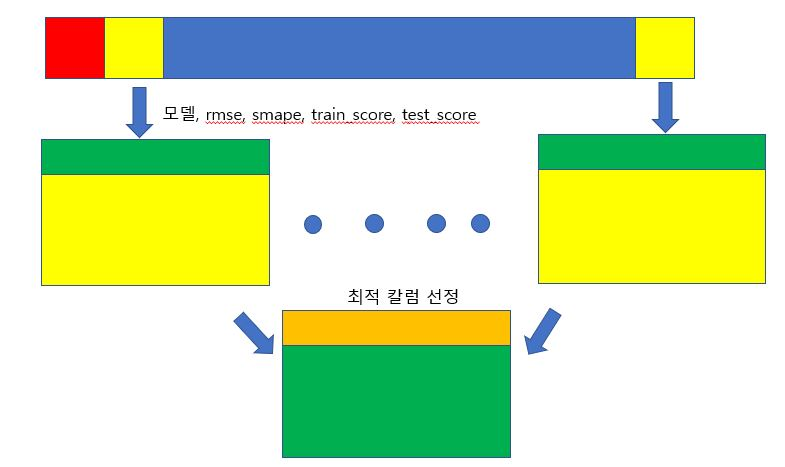

칼럼 별로 총 9개의 모델이

돌면서 데이터 프레임에 저장하고, 그 중에 test_score가 1등인 정보들을 다른 데이터 프레임에 저장하면서 최적의 칼럼을 찾습니다.

1. 최적칼럼을 변수추가법으로 진행(1개부터 test_score)가 더이상 안오르는 지점까지 

2. 모델을 fix하지 않음.(아무도 신뢰할수없음) 

3. 그래서 최적칼럼을 모델별로 고르게해서 1등인 모델의 최적칼럼을 변수로 추가해주고 이를 무한반복 


Q.왜 한 모델의 최적칼럼을 추가해주고 이후에 또 모델별로 다르게 돌리는지?
--


A. 첫 번째로 한 모델을 fix한다면, 그 모델이 과연 이 데이터프레임에 적합한지에 대해서 확신할 수 없음. 그 이유는 모델별로 장단점이 다르기 때문, 칼럼을 어떻게 주느냐에 따라서, 배깅이 좋을지, 부스팅이 좋을지 어떤 모델이 최고인지 항상 절대적으로 정해져있지 않음. 이에 따라, 칼럼이 추가됐다는 이유로 그 모델을 절대로  fix하지 않는 방식을 선택했음.



Q. 모델별로 최적칼럼이 다르다고 할때 최적칼럼들이 다 섞일수가 있을 텐데, 이 부분에 대해서 어떻게 생각하는지?
--

모델별로 최적칼럼이 따로 존재한다고 가정하면, 그 칼럼들이 섞일 수 있는 우려는 있음.

그러나, 그 논리대로면 한 모델의 최적칼럼을 추가해준것이므로 계속 그 모델이 1등 해야함.

덧붙여서, 똑같은 문제와 사건도 결국 그것을 바라보는 분석가의 시선에 따라 다르게 해석할 수 있다고 생각.

가령, 이를 다른 시선에서 바라보면 한 모델의 최적칼럼을 계속 추가해주는데, 갑자기 다른 모델이 1등이 되는 상황이 역전되는 상황까지 고려하여 칼럼을 찾을 수 있을 것이다라는 시선에서도 볼 수 있음.

Q. 그렇다면, 한 모델의 최적칼럼을 계속 추가해주는데, 다른 모델이 1등이 되는 상황이 일어났는지? 그 근거는?
--

국립중앙박물관의 최적칼럼을 찾는 과정을 보면, 다음과 같음.




추가한 칼럼
--
모델, rmse, smape, train_score, test_score
--

1)   평균수증기압(hPa)

randomforest		26070.541221	97.739651	0.817743	0.900246

2) 대형일최대증발량 나타난날(yyyymmdd)

randomforest	17079.277619	77.112750	0.877760	0.957188

3) 대형총증발량(mm)

randomforest	16890.159150	67.955684	0.868848	0.958130

4) 평균중하층운량(1/10)

randomforest	16507.637256	71.879592	0.898535	0.960006

- 떨어지기 시작하는 지점

5) 최저초상온도(°C)

randomforest	18208.313311	77.129323	0.907650	0.951340

- 다시 올라가기 시작

6) 평균해면기압(hPa)

xgboost	16027.823333	70.145507	0.977920	0.962297

7) 최저기온(°C)
--

xgboost	14179.888718	60.994257	0.974438	0.970490
--

- 다시 떨어지기 시작

8) 평균이슬점온도(°C)

xgboost	15017.507655	65.122963	0.974648	0.966900

9)  일최다강수량 나타난날(yyyymmdd)

xgboost	15784.186306	60.65566	0.978677	0.963434

- 계속 결과가 안 좋아 지므로 최저기온에서 stop

이를 통해 보면, randomforest regressor의 최적칼럼을 계속 추가해주는데 평균해면기압에서부터 갑자기 xgboost의 결과가 가장 잘 나오는 것이 그 근거임.

Q. 근데, 이렇게 2019년 관광지별 관광객수를 맞추는데만 초점을 두고 진행한다면, 과녁이 바뀌는 상황(즉, 실제값이 어떤게 들어올지 모르는 상황 혹은 test의 값이 바뀌는 상황)에서 무너지게 될텐데, 이에 대해 어떻게 생각하는지?
--

Great!! 정확한 지적. 이 방법은 "2019년 관광객수를 모델의 입장에서 무조건 잘 맞추겠다."라는 면에서는 방법이 될 수 있으나, 수학적으로도, 통계적으로도 좋은 접근 방법이 아니라는데에 동의하는 입장. 

칼로 예시를 들면, 이 칼은 회를 썰기 위해 mm단위로 계산된 정교한 칼이 될 수 있지만, 실제로 회가 아닌 무를 썰어야 하면, 이 칼은 
아무런 힘을 쓰지 못하고, 부러지고 말거임.

Q. 그럼 이에 대한 해결책이나 보완 방법은?
--

이러한 단점을 보완하기 위해, 가설을 하나 더 세웠고, 통계적인 방법으로 최적 칼럼 찾기 2탄도 동시에 진행중

Hypothesis 2. BIC Focusing to Tourist for Tourist Destination
--
Hypothesis 1. MODEL Focusing to 2019 TEST의 이러한 단점을 보완하기 위해,

Statsmodel의 BIC가 낮아지지 않는 지점까지 변수를 추가하는 방식으로 진행하도록 한다.